In [5]:
import numpy as np
import pandas as pd
from pimmslearn.sklearn.ae_transformer import AETransformer
from pimmslearn.sklearn.cf_transformer import CollaborativeFilteringTransformer
import pimmslearn.sampling

import time
import random

random.seed(10)

In [11]:
fn_intensities = ('../../Data/Petrosius/petrosius_sce.csv')
df = pd.read_csv(fn_intensities, index_col=0)
df = df.T
index_name = 'Sample ID'
column_name = 'protein group'
value_name = 'intensity'
sample_splits: bool = True
frac_non_train: float = 0.1  # fraction of non training data (validation and test split)
frac_mnar: float = 0.5
random_state: int = 42

In [12]:
df.index.name = index_name  # already set
df.columns.name = column_name  # not set due to csv disk file format
df = df.stack().to_frame('intensity')

df

intensity
Sample ID                                                                  protein group                                                      
20230421_EV_PAF_FAIMS_U3000_uPAC_wishDIA_plate1_scMESC_m2i_3PEP.Quantity   _ESTLHLVLR_.2                                                 2.931
                                                                           _IQDKEGIPPDQQR_.2                                             2.931
                                                                           _GAAQNIIPASTGAAK_.2                                           3.974
                                                                           _VVDLM[Oxidation (M)]AYM[Oxidation (M)]ASKE_.2                3.974
                                                                           _RVIISAPSADAPM[Oxidation (M)]FVM[Oxidation (M)]GVNHEK_.4      3.974
...                                                                                                                                        ...
20230421_EV_PAF_FAIMS_U3000_uPAC_wishDIA_plate1_scMESC_m15_351PEP.Quantity _DQLIVNLLKEEQAPQNK_.3                                         0.836
                                                                           _SLNPELGTDADK_.2                                              0.836
                                                                           _SVAEAPAPIDCELSTWSSWTACDPCQKK_.4                              1.361
                                                                           _GTITVSAQELK_.2                                              -2.417
                                                                           _MNLSEEVDLEDYVARPDK_.3                                       -2.930

[966929 rows x 1 columns]

In [13]:
if sample_splits:
    splits, thresholds, fake_na_mcar, fake_na_mnar = pimmslearn.sampling.sample_mnar_mcar(
        df_long=df,
        frac_non_train=frac_non_train,
        frac_mnar=frac_mnar,
        random_state=random_state,
    )
    splits = pimmslearn.sampling.check_split_integrity(splits)
else:
    splits = pimmslearn.sampling.DataSplits(is_wide_format=False)
    splits.train_X = df

/data/gent/442/vsc44202/.local/lib/python3.11/site-packages/pimmslearn/sampling.py:209: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  loc=float(quantile_frac),
/data/gent/442/vsc44202/.local/lib/python3.11/site-packages/pimmslearn/sampling.py:210: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  scale=float(0.3 * df_long.std()),


suggested_lr.valley = 0.00145


epoch,train_loss,valid_loss,time
0,4.069701,6.043015,00:02
1,1.925424,2.975254,00:02
2,0.455844,1.078966,00:02
3,0.315535,0.788376,00:02
4,0.262760,0.705966,00:02
5,0.238972,0.662310,00:02
6,0.220430,0.639128,00:02
7,0.198880,0.628105,00:02
8,0.181343,0.612225,00:02
9,0.164207,0.608906,00:02


No improvement since epoch 11: early stopping


KeyError: "['Sample ID'] not in index"

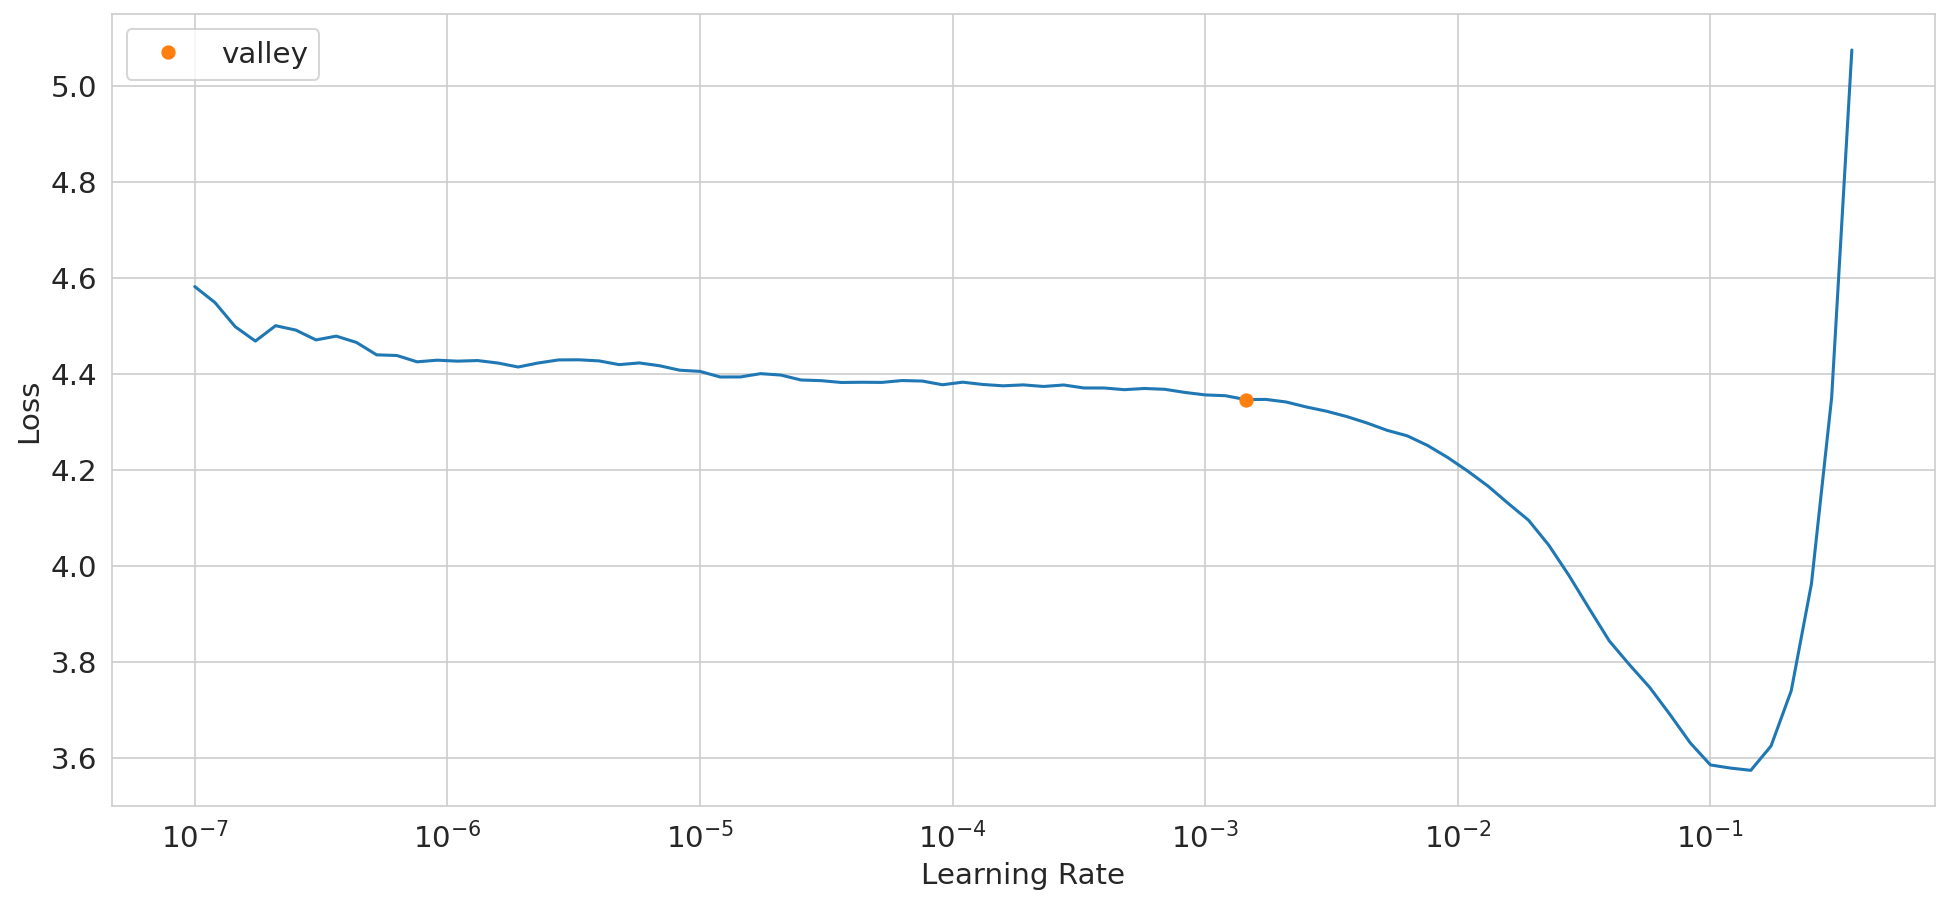

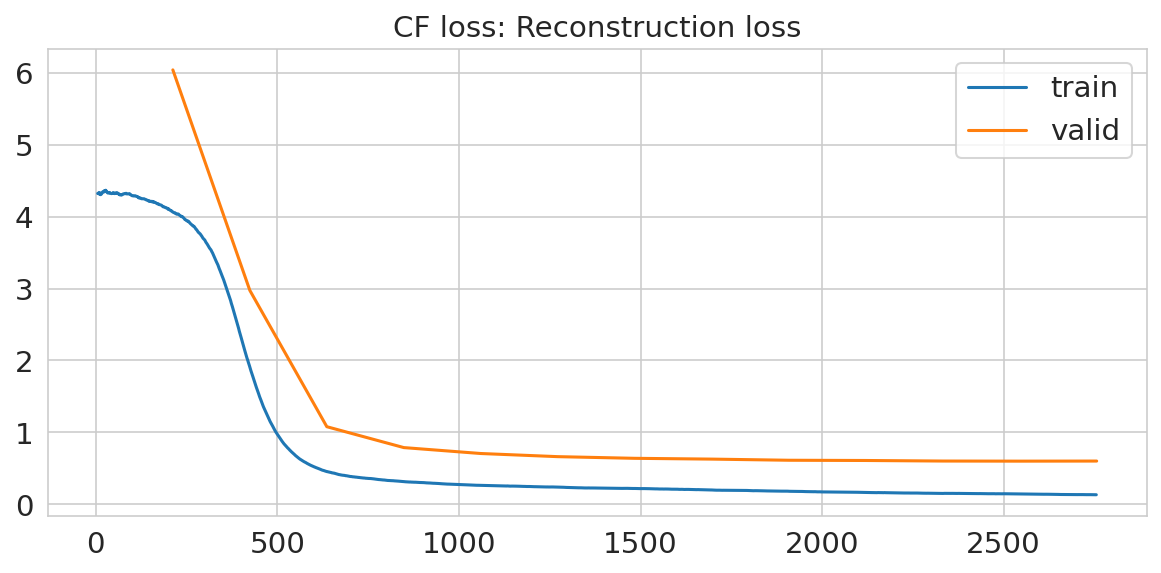

In [15]:
start = time.time()



model = CollaborativeFilteringTransformer(
    target_column=value_name,
    sample_column=index_name,
    item_column=column_name,
    n_factors=50, # dimension of separate sample and item embedding
    batch_size = 4096
)

model.fit(splits.train_X, splits.val_y, cuda=False, epochs_max=20)
df_imputed = model.transform(series).unstack()




end = time.time()

print(end - start)


df_imputed.to_csv("Output/CF_sce.csv")

/data/gent/442/vsc44202/.local/lib/python3.11/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,time
0,13327.713867,None,00:01
1,11560.440430,None,00:01
2,11325.283203,None,00:01
3,10672.590820,None,00:01
4,10095.716797,None,00:01
5,9987.453125,None,00:01
6,9847.672852,None,00:01
7,9909.764648,None,00:01
8,9852.727539,None,00:01
9,9760.491211,None,00:01


136.40436458587646


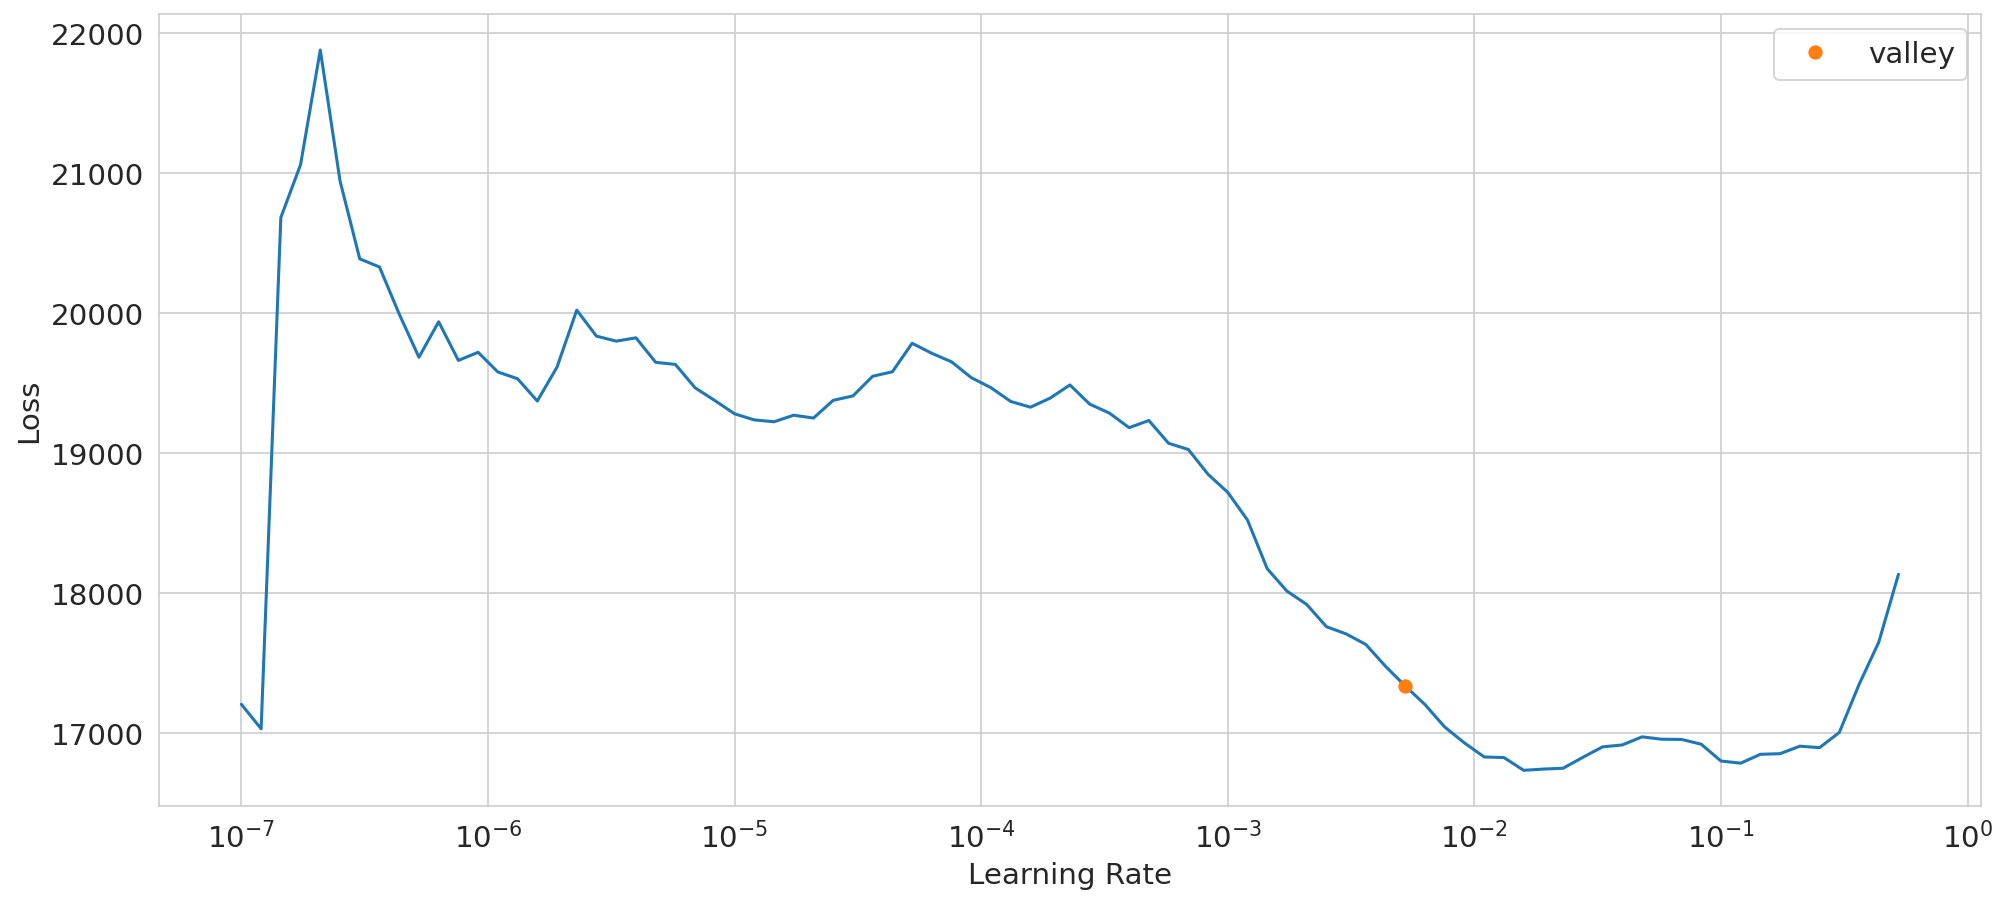

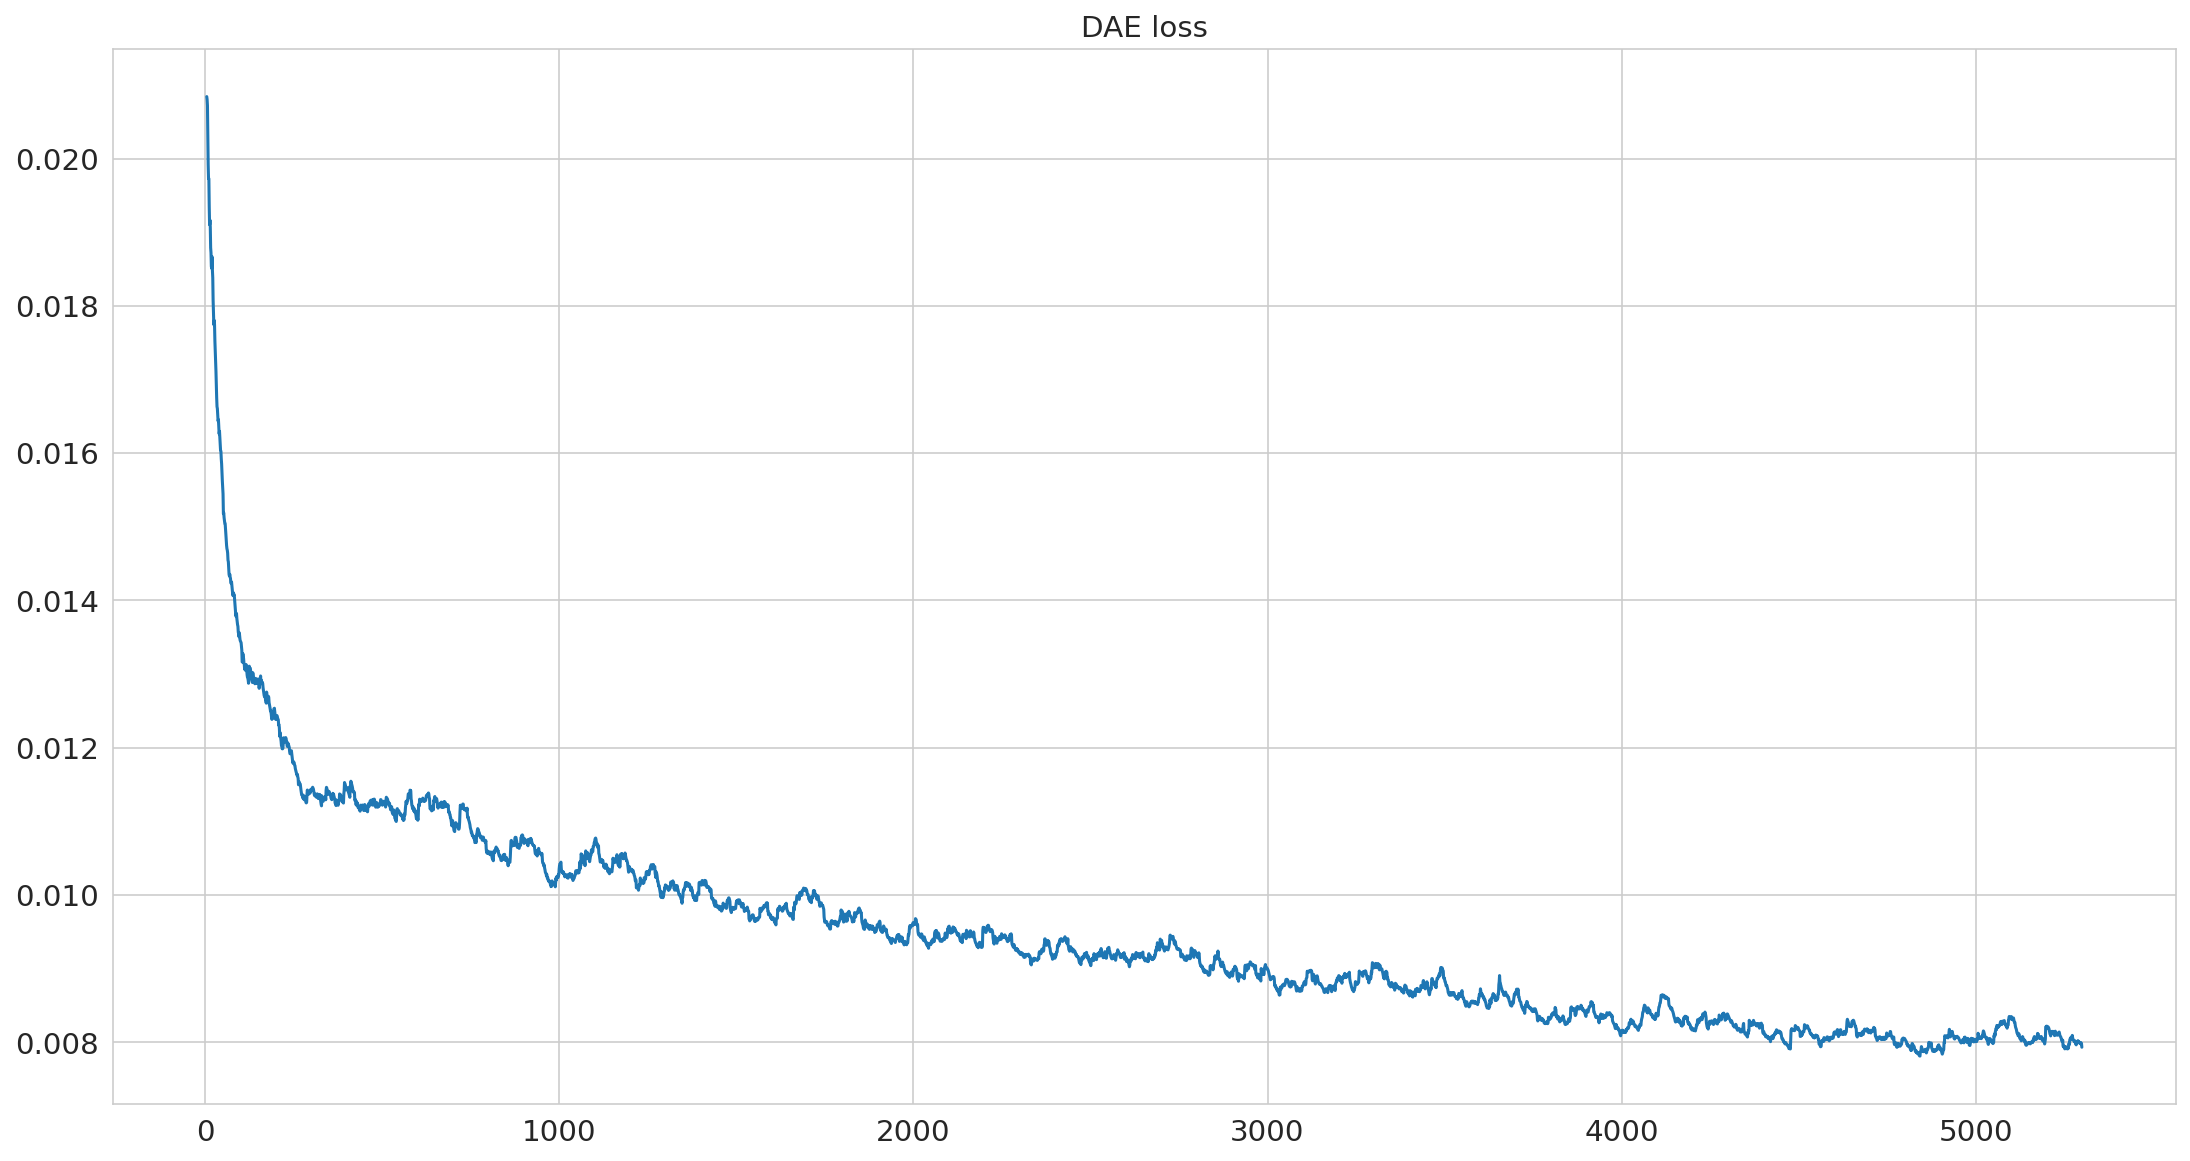

In [5]:
for x in range(1,11):
    fn_intensities = ('../../Data/Petrosius/petrosius_MISTOT10_MNAR25_' + str(x) + '.csv')
    df = pd.read_csv(fn_intensities, index_col=0)
    df = df.T
    
    start = time.time()

    df.index.name = index_name  # already set
    df.columns.name = column_name  

    series = df.stack()
    series.name = value_name  # ! important
    model = CollaborativeFilteringTransformer(
        target_column=value_name,
        sample_column=index_name,
        item_column=column_name,
        n_factors=7, # dimension of separate sample and item embedding
        batch_size = 4096
    )
    
    model.fit(series, cuda=False, epochs_max=20)
    df_imputed = model.transform(series).unstack()
    
    end = time.time()
    
    print(end - start)
    
    df_imputed.to_csv("Output/CF_MISTOT10_MNAR25_" + str(x) + ".csv")





/data/gent/442/vsc44202/.local/lib/python3.11/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,time
0,14283.242188,None,00:01
1,12121.181641,None,00:01
2,11278.167969,None,00:01
3,10639.602539,None,00:01
4,10465.291016,None,00:01
5,10024.961914,None,00:01
6,10025.953125,None,00:01
7,9942.764648,None,00:01
8,9652.371094,None,00:01
9,9801.186523,None,00:01


130.7440459728241


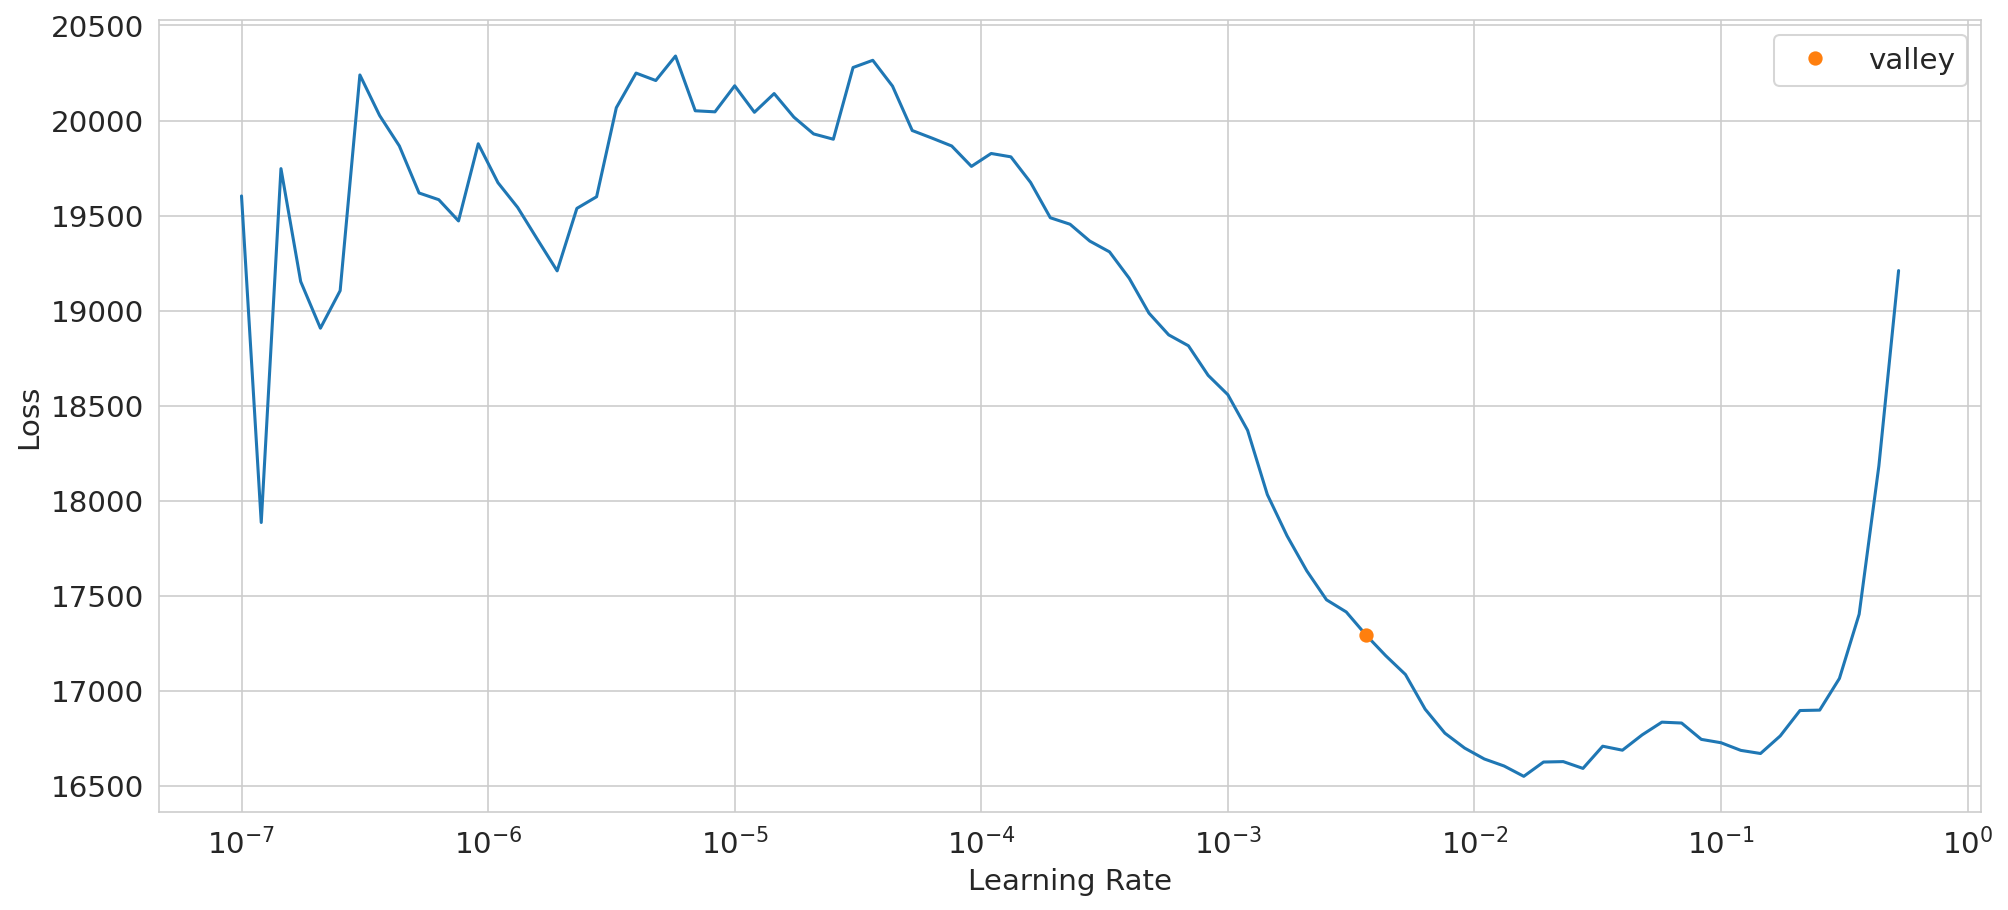

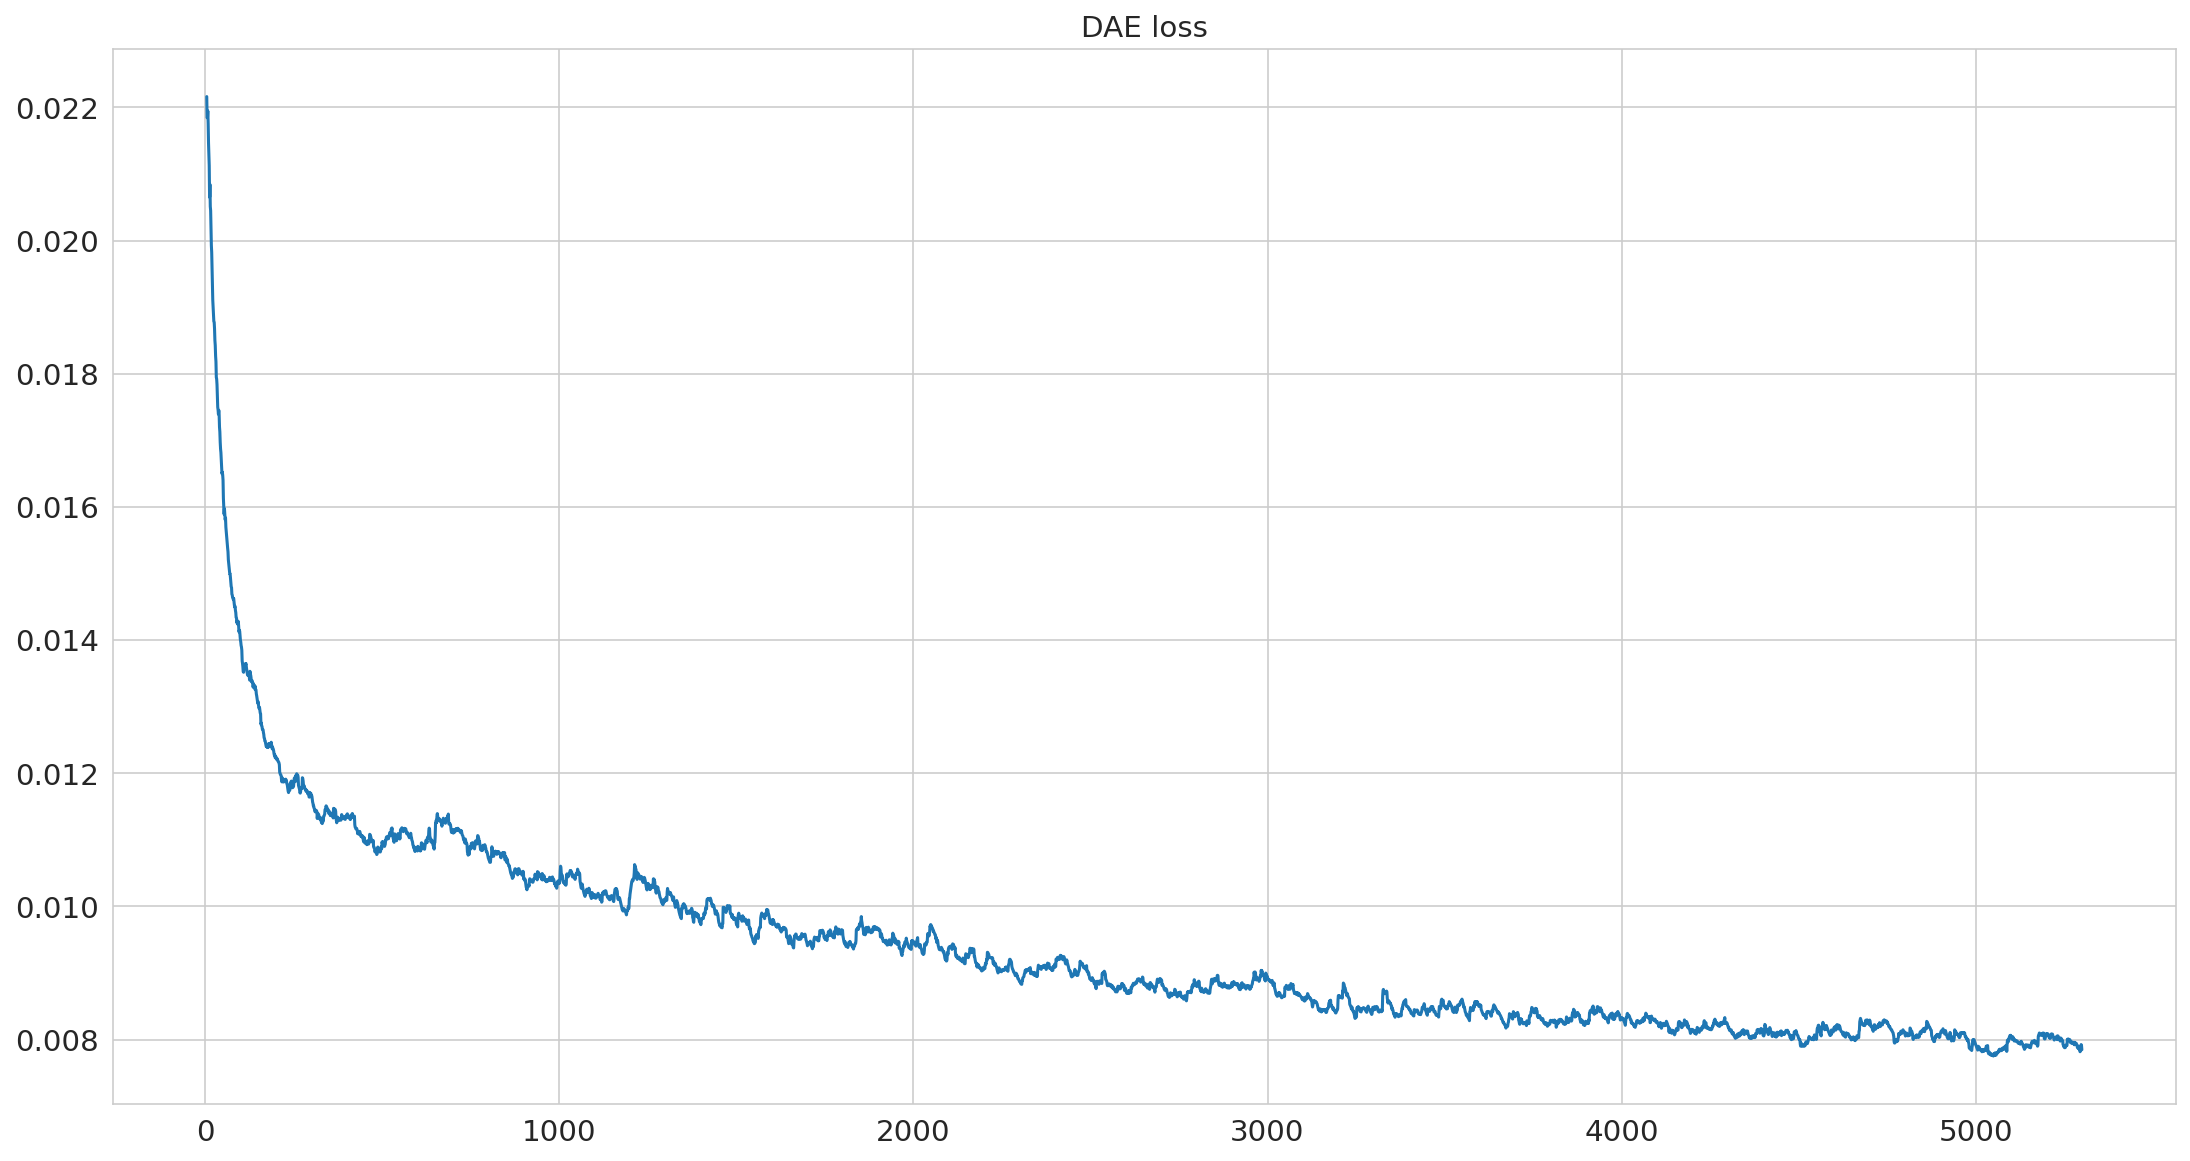

In [6]:
for x in range(1,11):
    fn_intensities = ('../../Data/Petrosius/petrosius_MISTOT10_MNAR50_' + str(x) + '.csv')
    df = pd.read_csv(fn_intensities, index_col=0)
    df = df.T
    
    start = time.time()

    df.index.name = index_name  # already set
    df.columns.name = column_name  

    series = df.stack()
    series.name = value_name  # ! important
    model = CollaborativeFilteringTransformer(
        target_column=value_name,
        sample_column=index_name,
        item_column=column_name,
        n_factors=7, # dimension of separate sample and item embedding
        batch_size = 4096
    )
    
    model.fit(series, cuda=False, epochs_max=20)
    df_imputed = model.transform(series).unstack()
    
    end = time.time()
    
    print(end - start)
    
    df_imputed.to_csv("Output/CF_MISTOT10_MNAR50_" + str(x) + ".csv")





/data/gent/442/vsc44202/.local/lib/python3.11/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,time
0,17378.087891,None,00:01
1,14704.865234,None,00:01
2,13235.779297,None,00:01
3,12090.409180,None,00:01
4,11458.203125,None,00:01
5,11025.088867,None,00:01
6,10470.729492,None,00:01
7,10402.282227,None,00:01
8,10513.939453,None,00:01
9,10279.858398,None,00:01


132.41389322280884


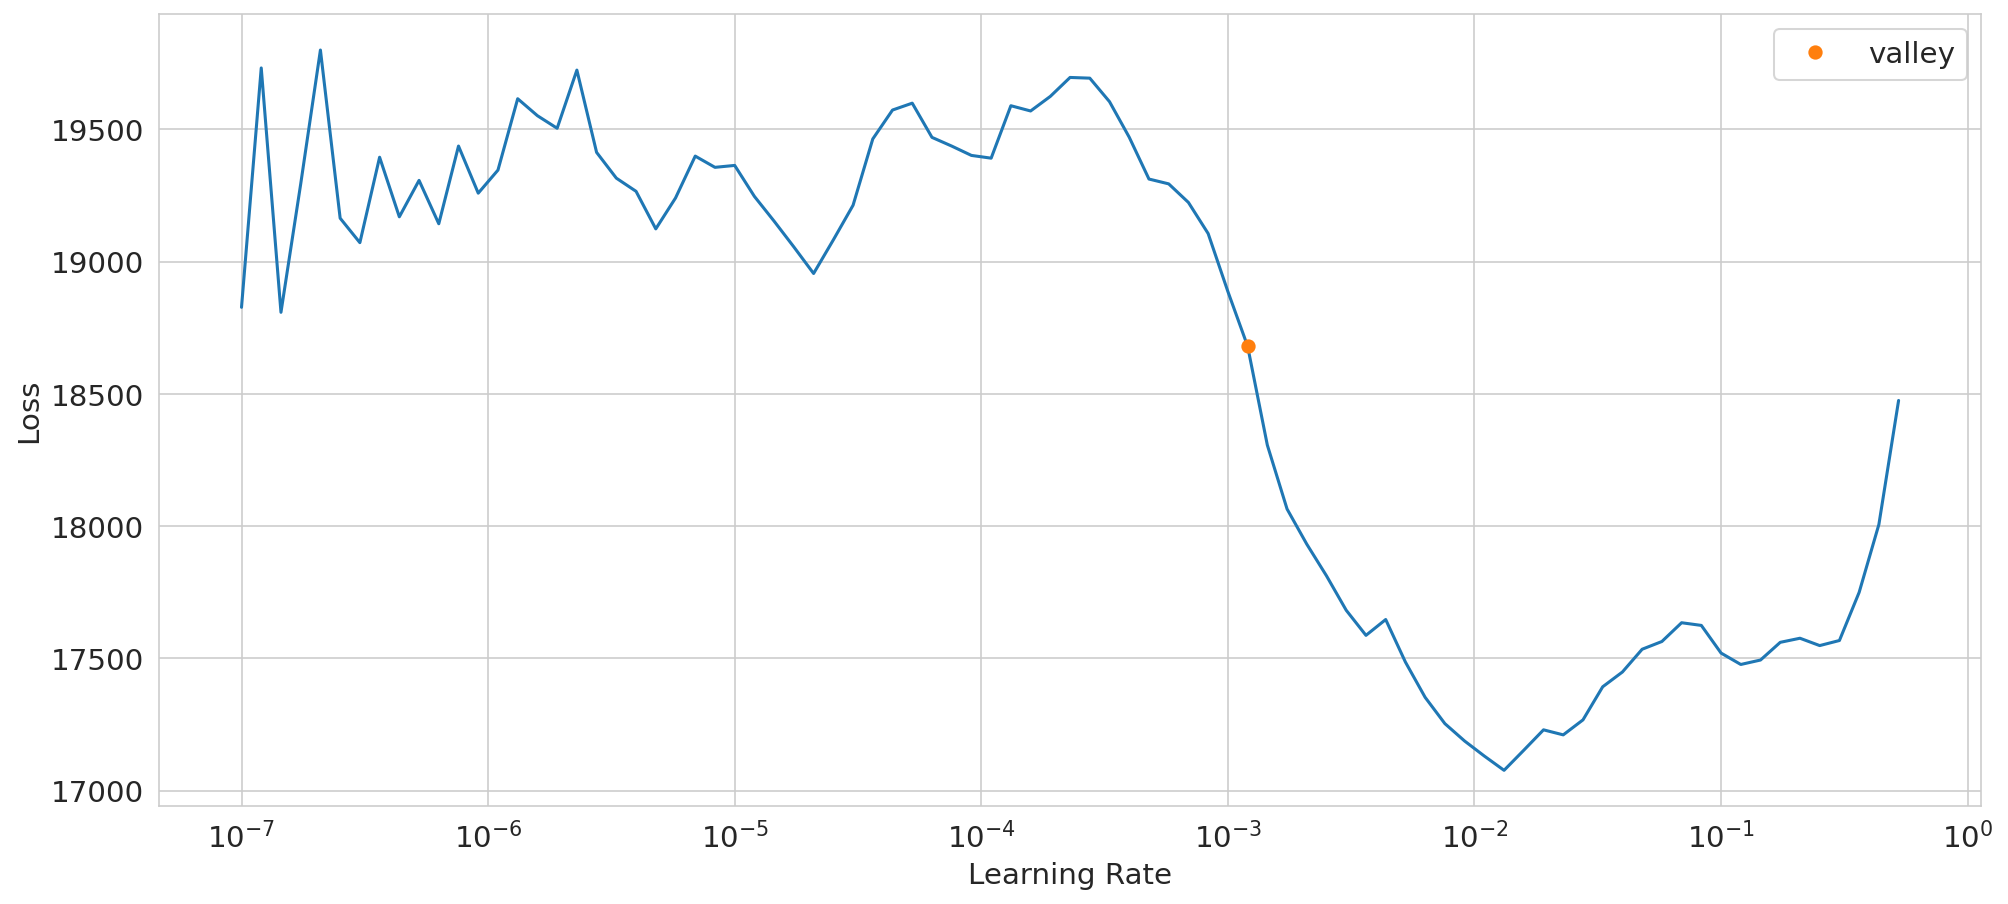

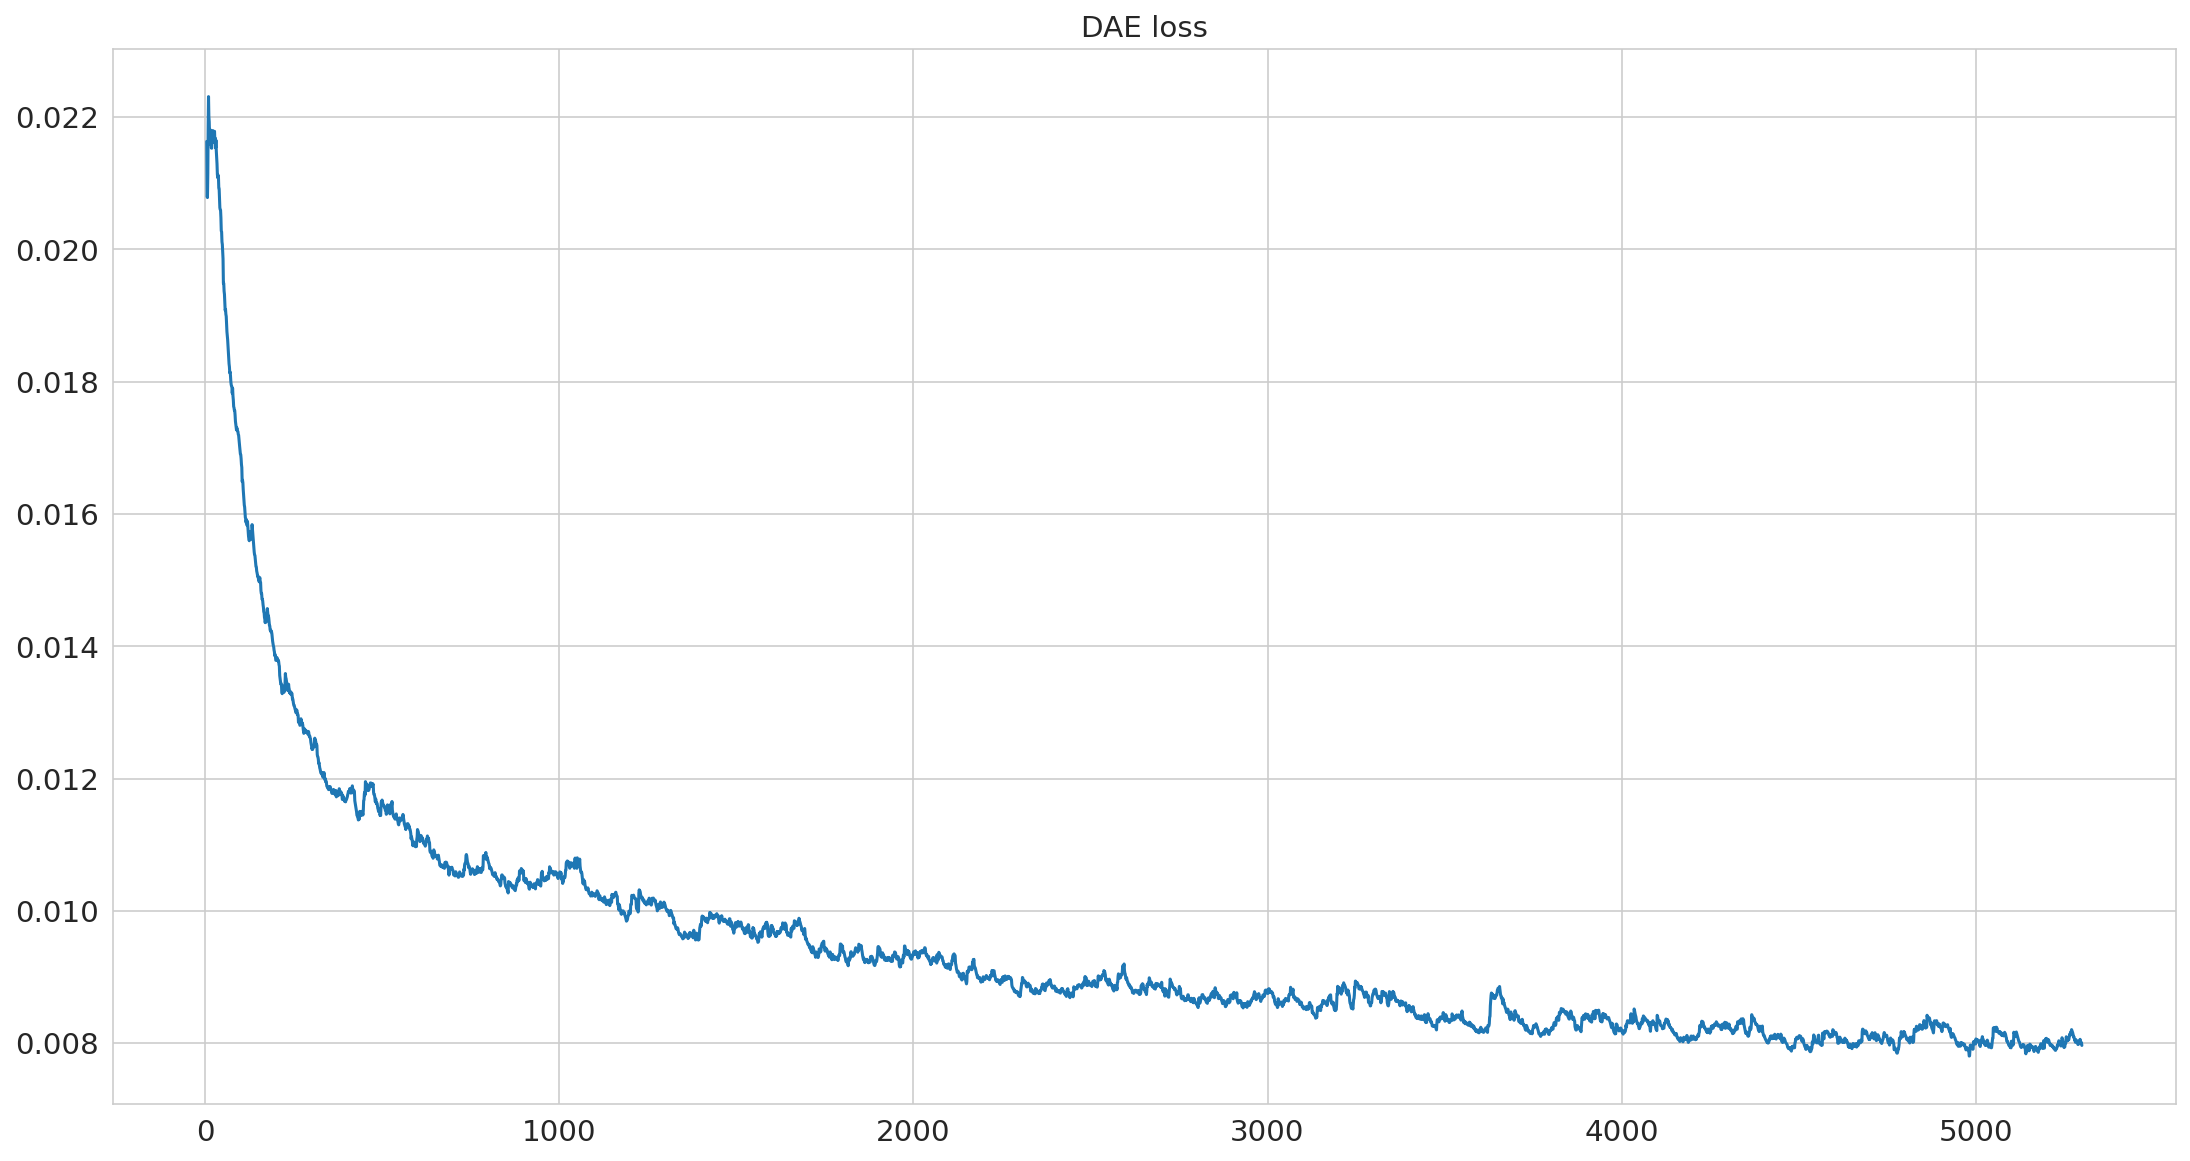

In [7]:
for x in range(1,11):
    fn_intensities = ('../../Data/Petrosius/petrosius_MISTOT10_MNAR75_' + str(x) + '.csv')
    df = pd.read_csv(fn_intensities, index_col=0)
    df = df.T
    
    start = time.time()

    df.index.name = index_name  # already set
    df.columns.name = column_name  

    series = df.stack()
    series.name = value_name  # ! important
    model = CollaborativeFilteringTransformer(
        target_column=value_name,
        sample_column=index_name,
        item_column=column_name,
        n_factors=7, # dimension of separate sample and item embedding
        batch_size = 4096
    )
    
    model.fit(series, cuda=False, epochs_max=20)
    df_imputed = model.transform(series).unstack()
    
    end = time.time()
    
    print(end - start)
    
    df_imputed.to_csv("Output/CF_MISTOT10_MNAR75_" + str(x) + ".csv")



